In [36]:
#下面这行代码，是为了把自己编写的代码文件当作一共模块导入，这里是把Utilities文件夹中的plotting.py文件当作python的模块导入，对应的是下面的from plotting import newfig, savefig。路径要随着不同设备的系统做相应的修改
import sys #导入sys模块。sys模块提供了一些变量和函数，用于与 Python解释器进行交互和访问。例如，sys.path 是一个 Python 在导入模块时会查找的路径列表，sys.argv 是一个包含命令行参数的列表，sys.exit() 函数可以用于退出 Python 程序。导入 sys 模块后，你就可以在你的程序中使用这些变量和函数了。
# sys.path.insert(0, '../../../Utilities/') #在 Python的sys.path列表中插入一个新的路径。sys.path是一个 Python 在导入模块时会查找的路径列表。新的路径'../../Utilities/'相对于当前脚本的路径。当你尝试导入一个模块时，Python 会在 sys.path 列表中的路径下查找这个模块。通过在列表开始位置插入一个路径，你可以让 Python 优先在这个路径下查找模块。这在你需要导入自定义模块或者不在 Python 标准库中的模块时非常有用。

import torch
#collections是python一个内置模块，提供了一些有用的数据结构
from collections import OrderedDict  #这个类是字典dict的一个子类，用于创建有序的字典。普通字典中元素顺序是无序的，在OrderedDict中元素的顺序是有序的，元素的顺序是按照它们被添加到字典中的顺序决定的。

from pyDOE import lhs #`pyDOE`是一个Python库，用于设计实验。它提供了一些函数来生成各种设计，如因子设计、拉丁超立方设计等。`lhs`是库中的一个函数，全名为"Latin Hypercube Sampling"，拉丁超立方采样。这是一种统计方法，用于生成一个近似均匀分布的多维样本点集。它在参数空间中生成一个非常均匀的样本，这对于高维数值优化问题非常有用，因为它可以更好地覆盖参数空间。
import numpy as np
import matplotlib.pyplot as plt
import scipy.io #导入了scipy库中的io模块。scipy.io模块包含了一些用于文件输入/输出的函数，例如读取和写入.mat文件（MATLAB格式）
from scipy.interpolate import griddata #`scipy.interpolate`是`scipy`库中的一个模块，提供了许多插值工具，用于在给定的离散数据点之间进行插值和拟合。`griddata`是这个模块中的一个函数，用于在无规则的数据点上进行插值。

import random

import skopt #用于优化问题的库，特别是机器学习中的超参数优化
from distutils.version import LooseVersion #distutils是Python的一个标准库，用于构建和安装Python包。LooseVersion是一个类，用于比较版本号


# from plotting_torch import newfig, savefig #从自定义的plotting_torch.py文件中导入了newfig和savefig函数。这两个函数用于创建和保存图形。这两个函数的定义在plotting_torch.py文件中

from mpl_toolkits.axes_grid1 import make_axes_locatable #`mpl_toolkits.axes_grid1`是`matplotlib`库的一个模块，提供了一些高级的工具来控制matplotlib图形中的坐标轴和颜色条。`make_axes_locatable`是模块中的一个函数，用于创建一个可分割的坐标轴。可以在这个坐标轴的四个方向（上、下、左、右）添加新的坐标轴或颜色条。
import matplotlib.gridspec as gridspec #是`matplotlib`库的一个模块，用于创建一个网格布局来放置子图。在`matplotlib`中可以创建一个或多个子图（subplot），每个子图都有自己的坐标轴，并可以在其中绘制图形。`gridspec`模块提供了一个灵活的方式来创建和放置子图。
import time #一个内置模块，用于处理时间相关的操作。


from tqdm import tqdm #一个快速，可扩展的python进度条库，可以在python长循环中添加一个进度提示信息，用户只需要封装任意的迭代器tqdm(iterator)。

import seaborn as sns  # 导入seaborn库用于绘制密度图

from sklearn.cluster import KMeans #sklearn是一个广泛使用的机器学习库，提供了各种算法和工具用于数据挖掘和分析。Kmeans是聚类算法，用于将数据分成预先指定数量的簇
import faiss #一种高效的相似性搜索和密集向量聚类库，适用于在大规模数据中进行高维向量的搜索和聚类操作
#faiss的安装方法：conda install -c conda-forge faiss-gpu
import matplotlib.cm as cm

In [37]:
import re
import pandas as pd

# 示例数据
methods_data = {
    'Xianxing': """
    [0.0033526283571227266, 0.004839421089160186, 0.0029592423433424547, 0.001229644682963641, 0.0014815990367619625, 0.0022884209192955323, 0.0036967522231484574, 0.002062505075870326, 0.0018108773509948619, 0.0029249074437349707]
    Error u of fuhe active learning(LHS sampling): 2.664600e-03
    [0.0003803891220506201, 0.0004485098641752755, 0.00030894884478713475, 0.00010945427547735179, 0.00023468044791139734, 0.00021653491208139953, 0.00037591956887970604, 0.00020362657267920375, 0.0002896524953625127, 0.0006228160275785302]
    MAE of fuhe active learning(LHS sampling): 3.190532e-04
    [1.3760259750613761e-06, 2.8637132103525737e-06, 1.070846703079021e-06, 1.849373048771606e-07, 2.682261192118011e-07, 6.408034154532763e-07, 1.6712515840300313e-06, 5.206920430243376e-07, 4.01174444990926e-07, 1.0470413221197485e-06]
    MSE of fuhe active learning(LHS sampling): 1.004471e-06
    [8.717239e-06, 121.195984, 3.2156177e-06, 0.0, 0.0, 9.000301e-06, 5.5172627e-06, 0.0, 3238.5708, 0.0]
    Chaos of fuhe active learning(LHS sampling): 3.359767e+02
    [0.00049918133, 0.00051515683, 0.00054863305, 0.00043186545, 0.000497872, 0.00049792416, 0.00054236536, 0.00046366896, 0.00055646524, 0.00052393135]
    Residual of fuhe active learning(LHS sampling): 5.077064e-04
    """,
    'Active': """
    [0.003172294737013694, 0.0017232108143125414, 0.00429719137560627, 0.004896597149279756, 0.00252893016983296, 0.0009073242089896197, 0.003666558382143215, 0.0004394195123286265, 0.003024152430234819, 0.0057429768321488345]
    Error u of fuhe active learning(LHS sampling): 3.039866e-03
    [0.0002727793466557132, 0.00015142488148081826, 0.0011341117053655367, 0.0004063325129951395, 0.0003100337955597948, 8.159163647006618e-05, 0.0003135552648880034, 0.00012118599291777183, 0.0008209635829926059, 0.0004900948906354259]
    MAE of fuhe active learning(LHS sampling): 4.102074e-04
    [1.2303020139852856e-06, 3.633758791230327e-07, 2.253802555674988e-06, 2.9304021752464323e-06, 7.880090458742406e-07, 1.0080233223903113e-07, 1.643361948831586e-06, 2.5266703511076475e-08, 1.1174369122568597e-06, 4.0409618922521255e-06]
    MSE of fuhe active learning(LHS sampling): 1.449372e-06
    [8.63843, 1.2835646, 0.0, 0.0, 0.0, 0.0, 5.9002818e-05, 4.7683716e-07, 8.932967e-05, 1.3065523e-05]
    Chaos of fuhe active learning(LHS sampling): 9.922156e-01
    [0.0005205422, 0.0005524982, 0.0006316134, 0.0005774442, 0.0006034251, 0.00060470804, 0.00043083966, 0.0005676219, 0.00056705996, 0.0005476698]
    Residual of fuhe active learning(LHS sampling): 5.603423e-04
    """,
    'Residual': """
    [0.009447045268137751, 0.0017757925877126865, 0.0019541054071175183, 0.002201158471548241, 0.0019412117117038467, 0.0011225765216897204, 0.002278461611211424, 0.002347580924822017, 0.0018896646066218741, 0.0020848456537590878]
    Error u of fuhe active learning(LHS sampling): 2.704244e-03
    [0.0008160827912868653, 0.00037498730882891076, 0.0001755662795432468, 0.00021566254975237644, 0.00030790636323721834, 0.00010053908262022837, 0.0001980342192543482, 0.0002059693940482644, 0.00027272106606474934, 0.00018181182234233202]
    MAE of fuhe active learning(LHS sampling): 2.849281e-04
    [1.0913378188304178e-05, 3.8562101548512897e-07, 4.6733020317744534e-07, 5.921952165822978e-07, 4.609491471215095e-07, 1.543376822400358e-07, 6.34825312696384e-07, 6.739245784616405e-07, 4.3685676147343515e-07, 5.317704250418828e-07]
    MSE of fuhe active learning(LHS sampling): 1.525119e-06
    [8.104477e-06, 2704.681, 0.000820691, 0.0, 3.3717478e-07, 0.0, 0.00011775418, 0.0, 9.767234e-05, 0.0]
    Chaos of fuhe active learning(LHS sampling): 2.704682e+02
    [0.0004155537, 0.00060528173, 0.00048770208, 0.00048738965, 0.0005184485, 0.0006322323, 0.0005856125, 0.00054641056, 0.00066680653, 0.00059627346]
    Residual of fuhe active learning(LHS sampling): 5.541711e-04
    """,
    '0.6Residualchaos': """
    [0.0014042966810294975, 0.0016199280367746544, 0.00223239375502587, 0.002201158471548241, 0.0021117360999863295, 0.001501933145571626, 0.0025537702304003476, 0.0030853948244133804, 0.001630195128457047, 0.0017740799886853374]
    Error u of fuhe active learning(LHS sampling): 2.011489e-03
    [0.00015201276716725809, 0.00015110056691643934, 0.0002127632465059243, 0.00021566254975237644, 0.00018918644441825663, 0.00013488203761789728, 0.0003126892295948295, 0.0002623149833219068, 0.00014934916020599477, 0.00016663849825165569]
    MAE of fuhe active learning(LHS sampling): 1.946599e-04
    [2.4146218514839883e-07, 3.2140713996865234e-07, 6.092316627457252e-07, 5.921952165822978e-07, 5.451356709193855e-07, 2.762804654258543e-07, 7.972023610047254e-07, 1.1635948751460256e-06, 3.250288466478611e-07, 3.8616952269753516e-07]
    MSE of fuhe active learning(LHS sampling): 5.257708e-07
    [7.4336557, 3.360455e-05, 9.375598, 0.0, 1.896387e-05, 6.302361e-06, 8.947779, 0.0, 0.00010501704, 1.4603138e-06]
    Chaos of fuhe active learning(LHS sampling): 2.575720e+00
    [0.00054834463, 0.00051077415, 0.0006296945, 0.00048738965, 0.0005817715, 0.00064554927, 0.00054325955, 0.0005361211, 0.0005760159, 0.0005740464]
    Residual of fuhe active learning(LHS sampling): 5.632967e-04
    """,
}

# 定义读取数据的函数
def extract_metrics(data):
    # 使用正则表达式提取数据
    error_u = re.findall(r'\[([^\]]+)\]', data)[0]
    mae = re.findall(r'\[([^\]]+)\]', data)[1]
    mse = re.findall(r'\[([^\]]+)\]', data)[2]
    chaos = re.findall(r'\[([^\]]+)\]', data)[3]
    residual = re.findall(r'\[([^\]]+)\]', data)[4]
    
    # 将字符串转换为浮点数列表
    error_u = list(map(float, error_u.split(',')))
    mae = list(map(float, mae.split(',')))
    mse = list(map(float, mse.split(',')))
    chaos = list(map(float, chaos.split(',')))
    residual = list(map(float, residual.split(',')))
    
    return error_u, mae, mse, chaos, residual

# 定义处理所有方法数据的函数
def process_methods_data(methods_data):
    data = {
        'Method': [],
        'Metric': [],
        'Values': []
    }
    
    for method, data_str in methods_data.items():
        error_u, mae, mse, chaos, residual = extract_metrics(data_str)
        
        data['Method'].append(method)
        data['Metric'].append('Error_u')
        data['Values'].append(error_u)
        
        data['Method'].append(method)
        data['Metric'].append('MAE')
        data['Values'].append(mae)
        
        data['Method'].append(method)
        data['Metric'].append('MSE')
        data['Values'].append(mse)

        data['Method'].append(method)
        data['Metric'].append('Chaos')
        data['Values'].append(chaos)

        data['Method'].append(method)
        data['Metric'].append('Residual')
        data['Values'].append(residual)
    
    return pd.DataFrame(data)

# 处理方法数据并生成 DataFrame
df = process_methods_data(methods_data)

# 打印 DataFrame
print(df)

              Method    Metric  \
0           Xianxing   Error_u   
1           Xianxing       MAE   
2           Xianxing       MSE   
3           Xianxing     Chaos   
4           Xianxing  Residual   
5             Active   Error_u   
6             Active       MAE   
7             Active       MSE   
8             Active     Chaos   
9             Active  Residual   
10          Residual   Error_u   
11          Residual       MAE   
12          Residual       MSE   
13          Residual     Chaos   
14          Residual  Residual   
15  0.6Residualchaos   Error_u   
16  0.6Residualchaos       MAE   
17  0.6Residualchaos       MSE   
18  0.6Residualchaos     Chaos   
19  0.6Residualchaos  Residual   

                                               Values  
0   [0.0033526283571227266, 0.004839421089160186, ...  
1   [0.0003803891220506201, 0.0004485098641752755,...  
2   [1.3760259750613761e-06, 2.8637132103525737e-0...  
3   [8.717239e-06, 121.195984, 3.2156177e-06, 0.0,...  
4   [

In [38]:
# 筛选出 Metric 为 "Error_u" 的数据
error_u_df = df[df["Metric"] == "Error_u"]

# 转换为字典格式
loss_values = {row["Method"]: row["Values"] for _, row in error_u_df.iterrows()}

# 显示结果
methods = list(loss_values.keys())
seeds = range(len(next(iter(loss_values.values()))))

seeds = range(10)

print("Methods:", methods)
print("Seeds:", seeds)
print("Loss Values:", loss_values)

Methods: ['Xianxing', 'Active', 'Residual', '0.6Residualchaos']
Seeds: range(0, 10)
Loss Values: {'Xianxing': [0.0033526283571227266, 0.004839421089160186, 0.0029592423433424547, 0.001229644682963641, 0.0014815990367619625, 0.0022884209192955323, 0.0036967522231484574, 0.002062505075870326, 0.0018108773509948619, 0.0029249074437349707], 'Active': [0.003172294737013694, 0.0017232108143125414, 0.00429719137560627, 0.004896597149279756, 0.00252893016983296, 0.0009073242089896197, 0.003666558382143215, 0.0004394195123286265, 0.003024152430234819, 0.0057429768321488345], 'Residual': [0.009447045268137751, 0.0017757925877126865, 0.0019541054071175183, 0.002201158471548241, 0.0019412117117038467, 0.0011225765216897204, 0.002278461611211424, 0.002347580924822017, 0.0018896646066218741, 0.0020848456537590878], '0.6Residualchaos': [0.0014042966810294975, 0.0016199280367746544, 0.00223239375502587, 0.002201158471548241, 0.0021117360999863295, 0.001501933145571626, 0.0025537702304003476, 0.0030853

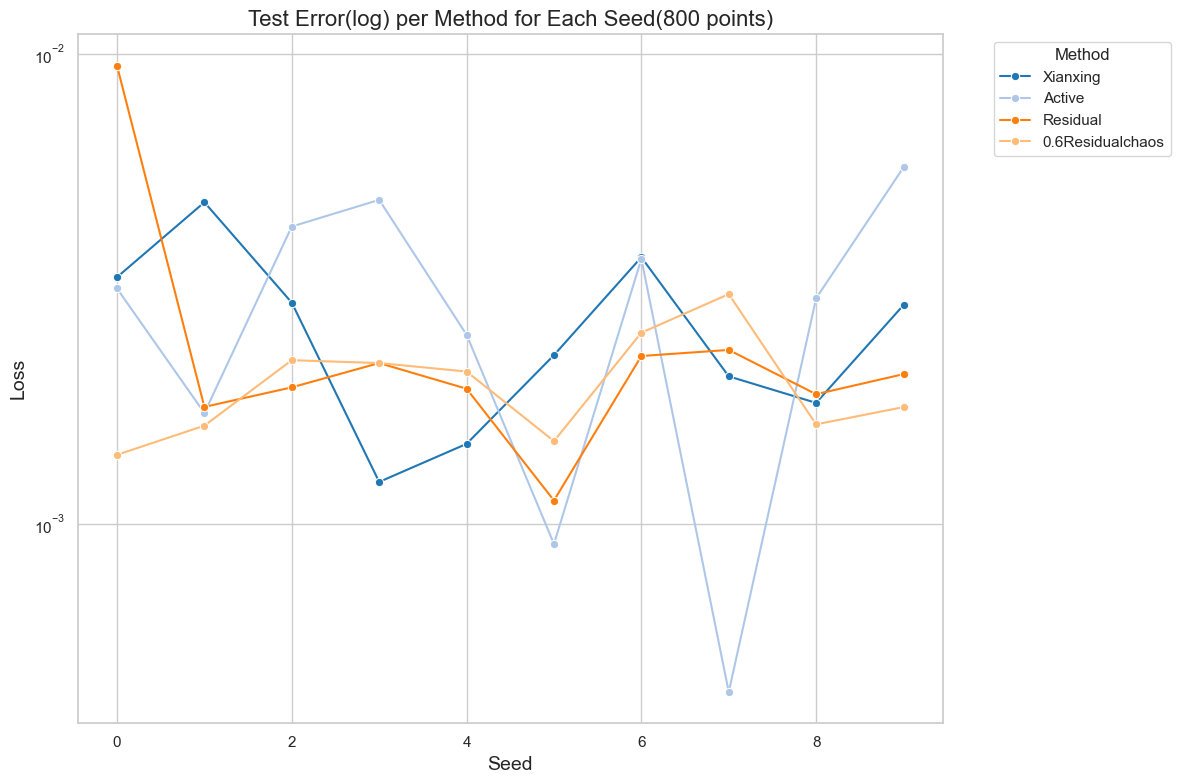

In [39]:
# 1. 转换数据为 DataFrame
data = []
for method, values in loss_values.items():
    for seed, value in enumerate(values):
        data.append({'Method': method, 'Seed': seed, 'Loss': value})

dd = pd.DataFrame(data)

# 确保方法按指定顺序排序
dd['Method'] = pd.Categorical(dd['Method'], categories=methods, ordered=True)

# 2. 绘制折线图
plt.figure(figsize=(12, 8))
sns.lineplot(data=dd, x='Seed', y='Loss', hue='Method', palette='tab20', marker='o')


# 设置纵坐标为对数尺度
plt.yscale('log')

# 3. 设置图形标题和标签

plt.title('Test Error(log) per Method for Each Seed(800 points)', fontsize=16)
plt.xlabel('Seed', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# 4. 显示图形
plt.show()

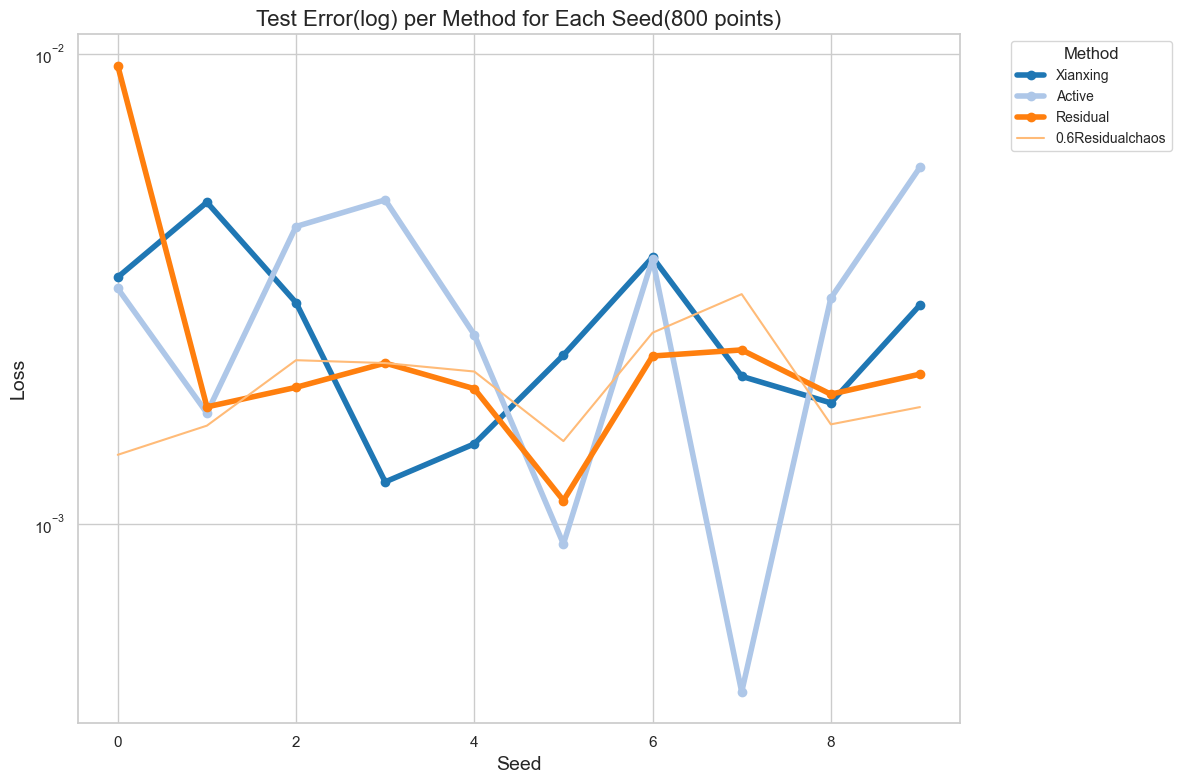

In [40]:
# 2. 设置颜色和线宽
highlight_methods = ['PINN', 'Residual', 'Active',"Xianxing","25000PINN","tongchengbenPINN","25000Xianxing","tongchengbenXianxing"]
colors = sns.color_palette("tab20", len(methods))  # 使用 Seaborn 默认调色板
color_mapping = {method: colors[i] for i, method in enumerate(methods)}

linewidths = {method: 4 if method in highlight_methods else 1.5 for method in methods}

# 3. 绘制图形
plt.figure(figsize=(12, 8))

for method in methods:
    subset = dd[dd['Method'] == method]
    plt.plot(
        subset['Seed'], subset['Loss'],
        label=method,
        color=color_mapping[method],
        linewidth=linewidths[method],
        marker='o' if method in highlight_methods else None,
    )

# 设置纵坐标为对数尺度
plt.yscale('log')

# 4. 设置图形标题和标签
plt.title('Test Error(log) per Method for Each Seed(800 points)', fontsize=16)
plt.xlabel('Seed', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid(True)
plt.tight_layout()

# 5. 显示图形
plt.show()

C:\Users\cheny\AppData\Local\Temp\ipykernel_23036\959944533.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Values', y='Method', data=dd, ax=ax, palette=palette)


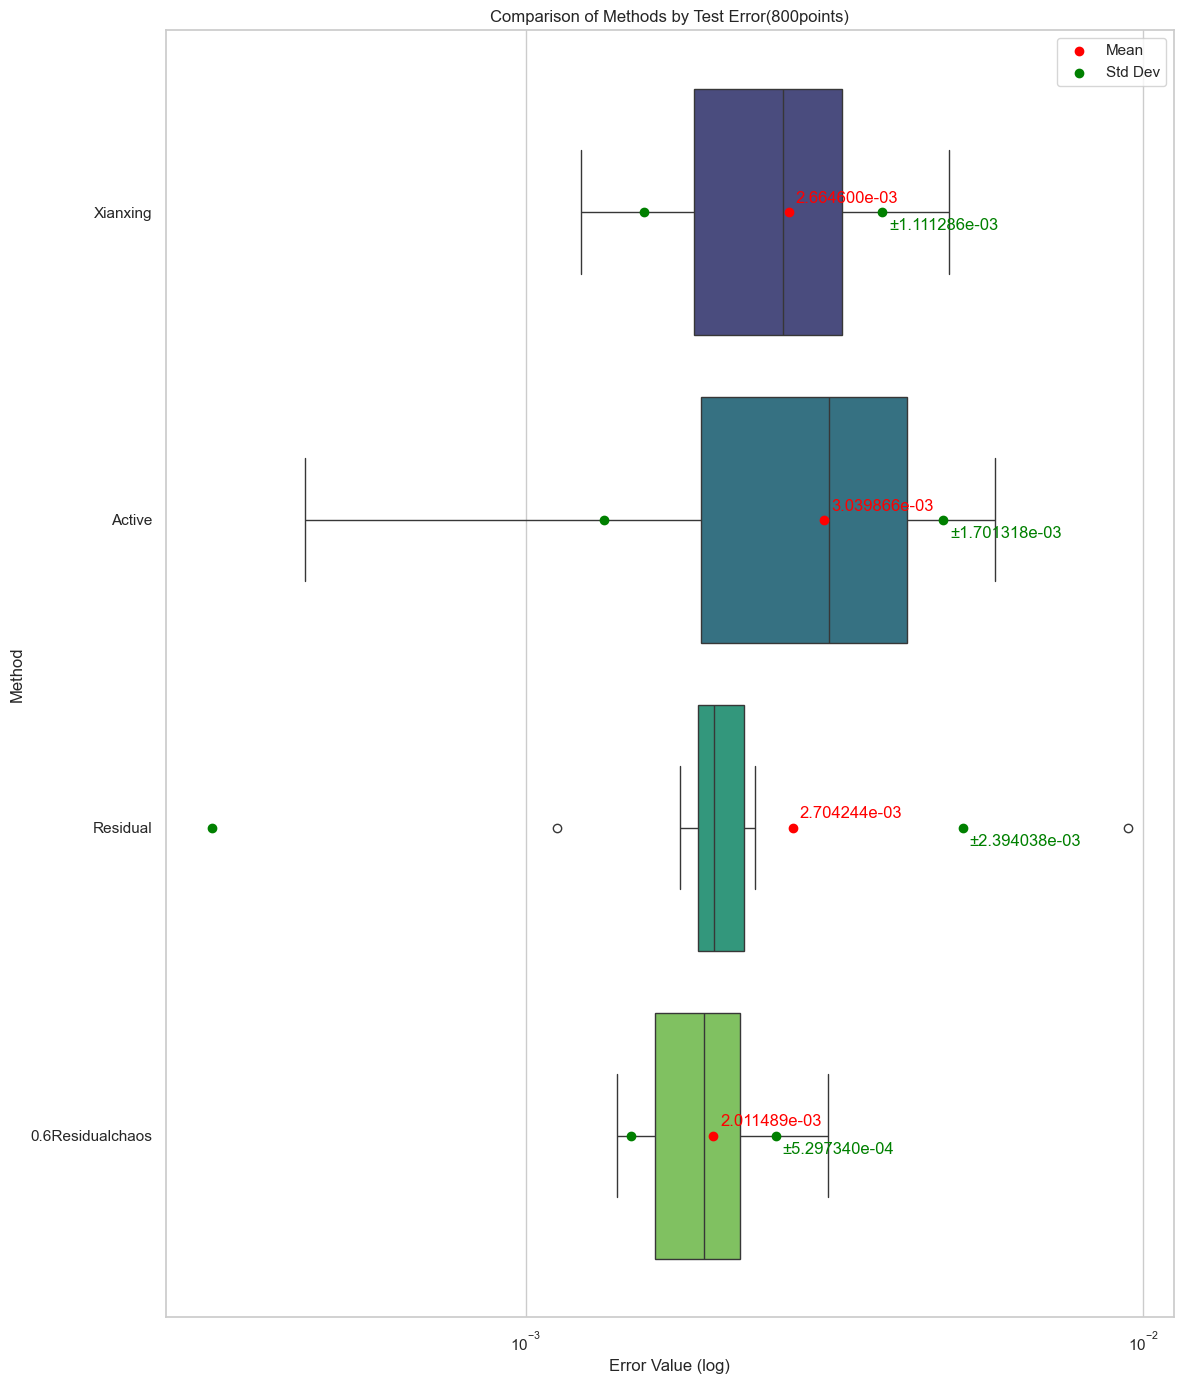

In [41]:
# 创建用于绘图的 DataFrame
data = []
for method, values in loss_values.items():
    for value in values:
        data.append({'Method': method, 'Values': value})


dd = pd.DataFrame(data)

# 设置 Seaborn 样式
sns.set(style="whitegrid")

# 将原始方法顺序设置为分类顺序
dd['Method'] = pd.Categorical(dd['Method'], categories=methods, ordered=True)

# 计算均值和标准差时保持顺序
mean_std_df = dd.groupby('Method')['Values'].agg(['mean', 'std']).reset_index()

# 创建图像
fig, ax = plt.subplots(figsize=(12, 14))

# 使用 Seaborn 绘制箱线图
palette = sns.color_palette("viridis", len(mean_std_df))
sns.boxplot(x='Values', y='Method', data=dd, ax=ax, palette=palette)

# 设置对数刻度
ax.set_xscale('log')

# 标注均值和标准差
for index, row in mean_std_df.iterrows():
    y_pos = list(mean_std_df['Method']).index(row['Method'])
    # 绘制均值为红点
    ax.scatter(row['mean'], y_pos, color='red', zorder=5, label="Mean" if index == 0 else "")
    # 绘制方差为绿点
    ax.scatter(row['mean'] + row['std'], y_pos, color='green', zorder=5, label="Std Dev" if index == 0 else "")
    ax.scatter(row['mean'] - row['std'], y_pos, color='green', zorder=5)
    # 标注均值和标准差值
    ax.annotate(f'{row["mean"]:.6e}', 
                xy=(row['mean'], y_pos), 
                xytext=(5, 10), 
                textcoords='offset points',
                va='center', 
                ha='left',
                color='red')
    ax.annotate(f'±{row["std"]:.6e}', 
                xy=(row['mean'] + row['std'], y_pos), 
                xytext=(5, -10), 
                textcoords='offset points',
                va='center', 
                ha='left',
                color='green')

# 添加标题和标签
ax.set_title('Comparison of Methods by Test Error(800points)')
ax.set_xlabel('Error Value (log)')
ax.set_ylabel('Method')

# 添加图例
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:2], labels[:2], loc='upper right')

# 调整图像布局
plt.tight_layout()

# 显示图像
plt.show()

In [42]:
(2.664600e-03-2.011489e-03)/2.664600e-03

0.2451065826015162

C:\Users\cheny\AppData\Local\Temp\ipykernel_23036\592110665.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


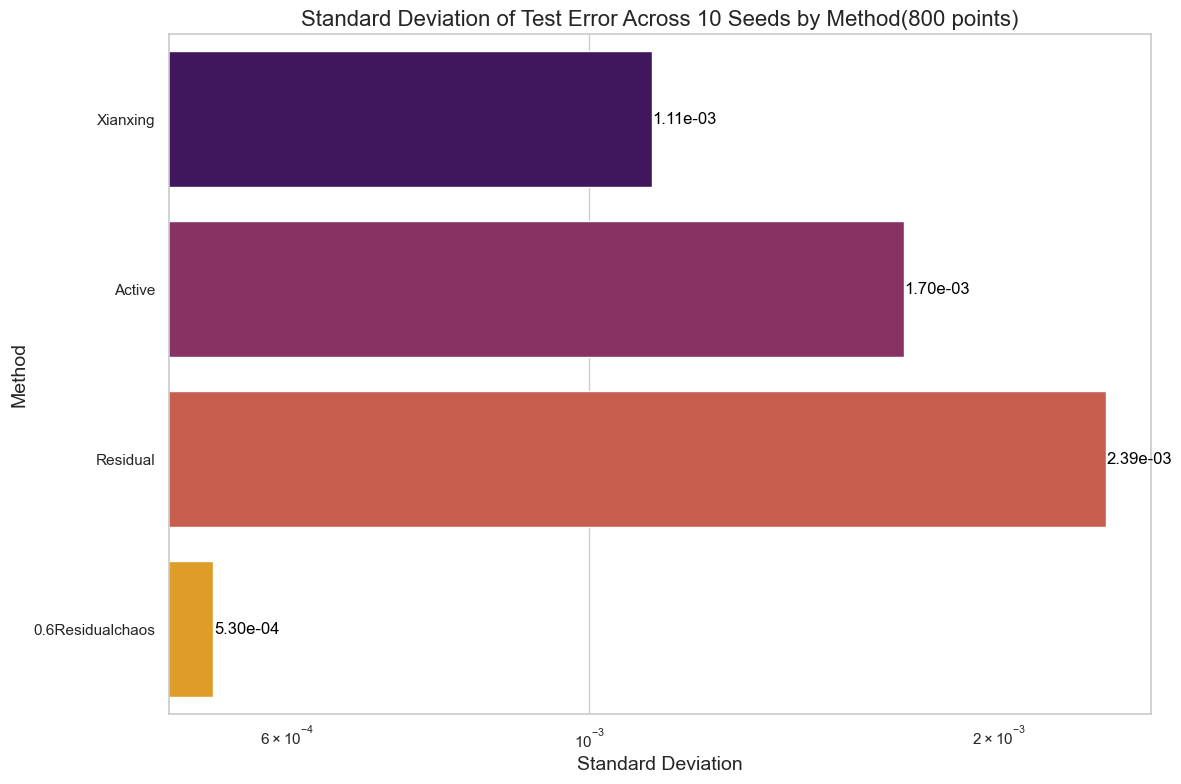

In [43]:
# 计算每种方法在10个seed下的标准差
std_df = dd.groupby('Method')['Values'].std().reset_index()
std_df.rename(columns={'Values': 'Std Dev'}, inplace=True)
# 创建图像
plt.figure(figsize=(12, 8))
# 使用 Seaborn 绘制标准差柱状图
sns.barplot(
    x='Std Dev',
    y='Method',
    data=std_df,
    palette="inferno",
    orient='h'
)

plt.xscale('log')

# 添加标题和轴标签
plt.title('Standard Deviation of Test Error Across 10 Seeds by Method(800 points)', fontsize=16)
plt.xlabel('Standard Deviation', fontsize=14)
plt.ylabel('Method', fontsize=14)
# 显示标准差值
for index, row in std_df.iterrows():
    plt.text(
        row['Std Dev'] + 0.000001,  # 偏移值用于使文字避开柱状图
        index,
        f'{row["Std Dev"]:.2e}',
        color='black',
        va='center',
        fontsize=12
    )
# 调整布局
plt.tight_layout()
# 显示图像
plt.show()

In [45]:
# 筛选出 Metric 为 "Error_u" 的数据
error_u_df = df[df["Metric"] == "MAE"]

# 转换为字典格式
loss_values = {row["Method"]: row["Values"] for _, row in error_u_df.iterrows()}

# 显示结果
methods = list(loss_values.keys())
seeds = range(len(next(iter(loss_values.values()))))

seeds = range(10)

print("Methods:", methods)
print("Seeds:", seeds)
print("Loss Values:", loss_values)

Methods: ['Xianxing', 'Active', 'Residual', '0.6Residualchaos']
Seeds: range(0, 10)
Loss Values: {'Xianxing': [0.0003803891220506201, 0.0004485098641752755, 0.00030894884478713475, 0.00010945427547735179, 0.00023468044791139734, 0.00021653491208139953, 0.00037591956887970604, 0.00020362657267920375, 0.0002896524953625127, 0.0006228160275785302], 'Active': [0.0002727793466557132, 0.00015142488148081826, 0.0011341117053655367, 0.0004063325129951395, 0.0003100337955597948, 8.159163647006618e-05, 0.0003135552648880034, 0.00012118599291777183, 0.0008209635829926059, 0.0004900948906354259], 'Residual': [0.0008160827912868653, 0.00037498730882891076, 0.0001755662795432468, 0.00021566254975237644, 0.00030790636323721834, 0.00010053908262022837, 0.0001980342192543482, 0.0002059693940482644, 0.00027272106606474934, 0.00018181182234233202], '0.6Residualchaos': [0.00015201276716725809, 0.00015110056691643934, 0.0002127632465059243, 0.00021566254975237644, 0.00018918644441825663, 0.0001348820376178

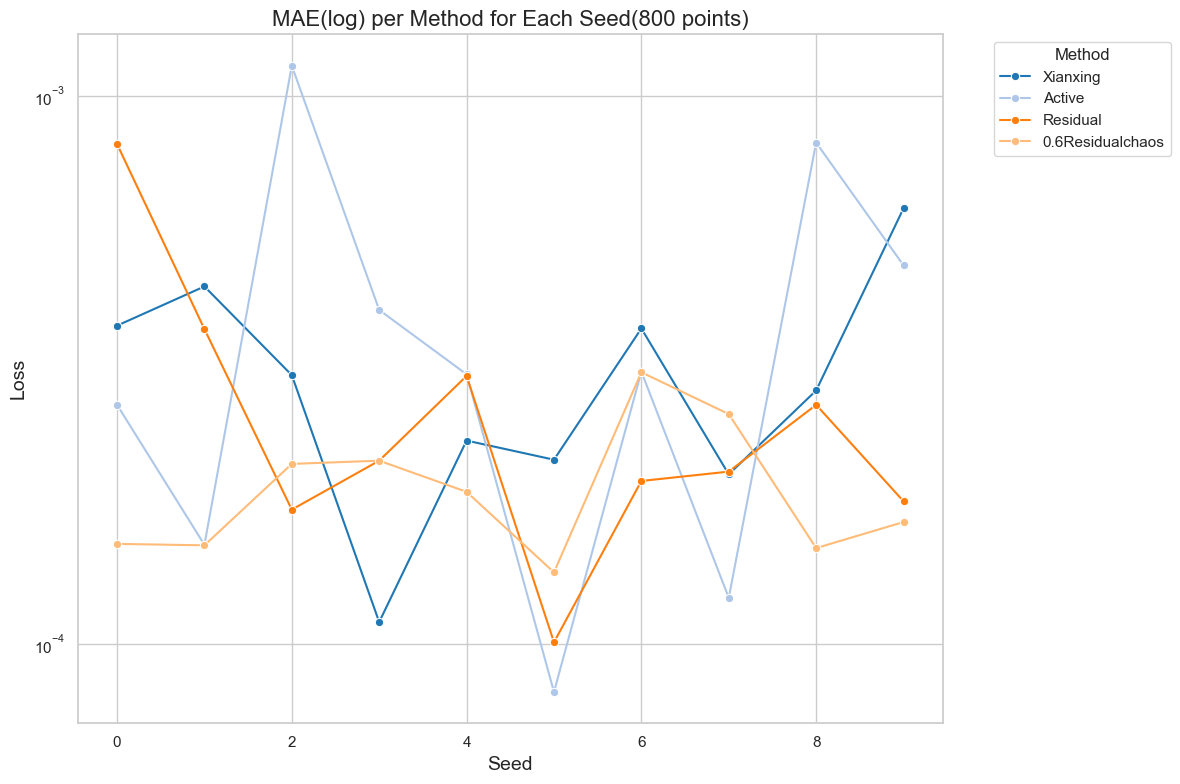

In [46]:
# 1. 转换数据为 DataFrame
data = []
for method, values in loss_values.items():
    for seed, value in enumerate(values):
        data.append({'Method': method, 'Seed': seed, 'Loss': value})

dd = pd.DataFrame(data)

# 确保方法按指定顺序排序
dd['Method'] = pd.Categorical(dd['Method'], categories=methods, ordered=True)



# 2. 绘制折线图
plt.figure(figsize=(12, 8))
sns.lineplot(data=dd, x='Seed', y='Loss', hue='Method', palette='tab20', marker='o')

# 设置纵坐标为对数尺度
plt.yscale('log')

# 3. 设置图形标题和标签
plt.title('MAE(log) per Method for Each Seed(800 points)', fontsize=16)
plt.xlabel('Seed', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# 4. 显示图形
plt.show()

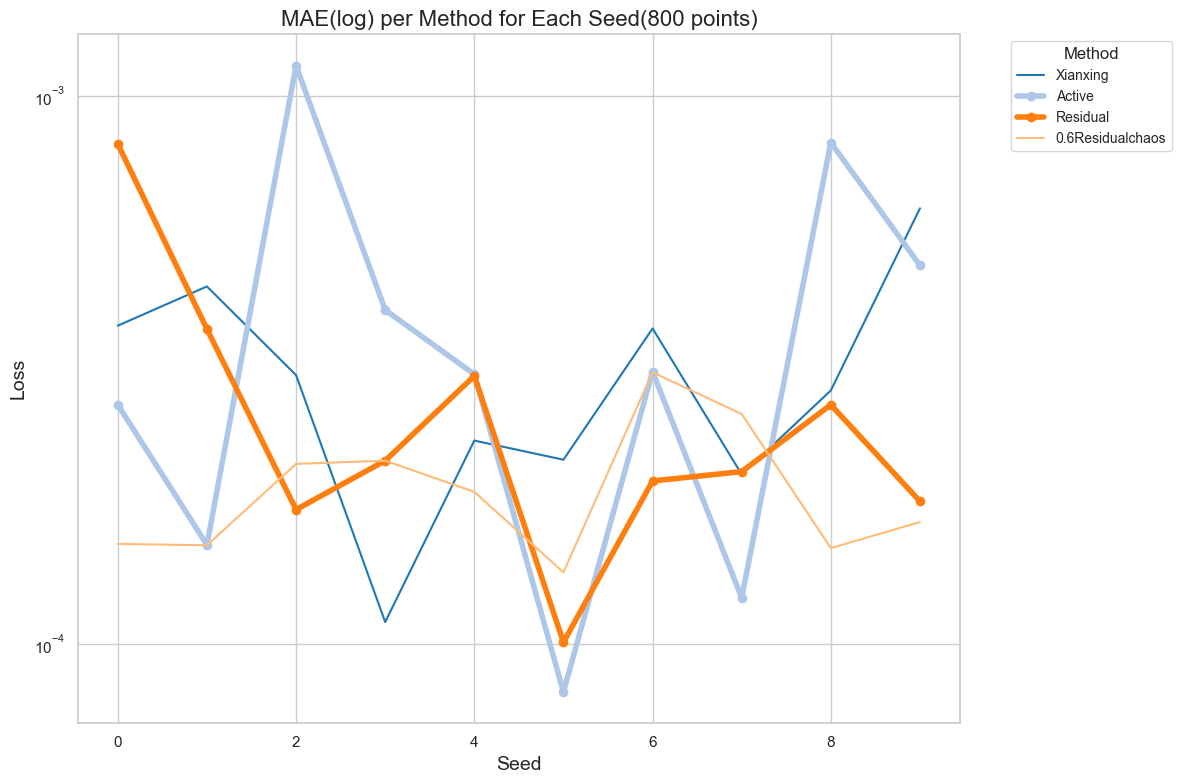

In [47]:
# 2. 设置颜色和线宽
highlight_methods = ['PINN', 'Residual', 'Active']
colors = sns.color_palette("tab20", len(methods))  # 使用 Seaborn 默认调色板
color_mapping = {method: colors[i] for i, method in enumerate(methods)}

linewidths = {method: 4 if method in highlight_methods else 1.5 for method in methods}

# 3. 绘制图形
plt.figure(figsize=(12, 8))

for method in methods:
    subset = dd[dd['Method'] == method]
    plt.plot(
        subset['Seed'], subset['Loss'],
        label=method,
        color=color_mapping[method],
        linewidth=linewidths[method],
        marker='o' if method in highlight_methods else None,
    )


# 设置纵坐标为对数尺度
plt.yscale('log')

# 4. 设置图形标题和标签
plt.title('MAE(log) per Method for Each Seed(800 points)', fontsize=16)
plt.xlabel('Seed', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid(True)
plt.tight_layout()

# 5. 显示图形
plt.show()

C:\Users\cheny\AppData\Local\Temp\ipykernel_23036\822122591.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Values', y='Method', data=dd, ax=ax, palette=palette)


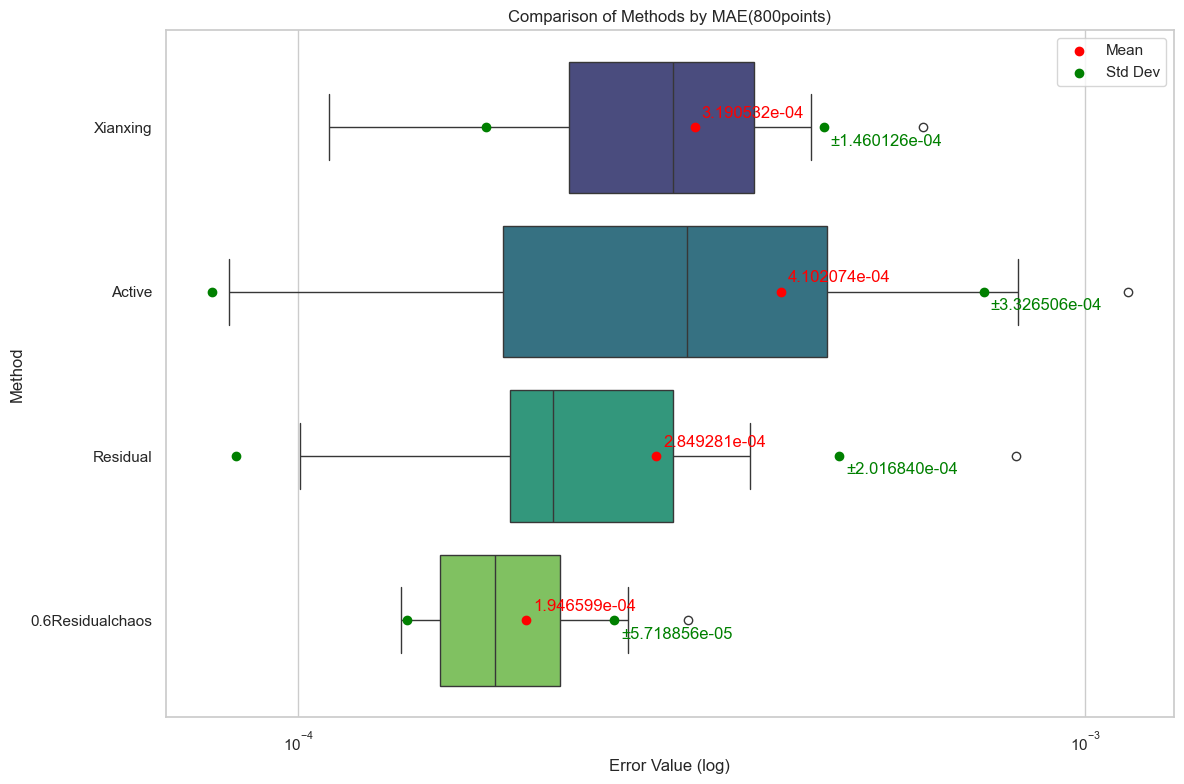

In [48]:
# 创建用于绘图的 DataFrame
data = []
for method, values in loss_values.items():
    for value in values:
        data.append({'Method': method, 'Values': value})


dd = pd.DataFrame(data)

# 设置 Seaborn 样式
sns.set(style="whitegrid")

# 将原始方法顺序设置为分类顺序
dd['Method'] = pd.Categorical(dd['Method'], categories=methods, ordered=True)

# 计算均值和标准差时保持顺序
mean_std_df = dd.groupby('Method')['Values'].agg(['mean', 'std']).reset_index()

# 创建图像
fig, ax = plt.subplots(figsize=(12, 8))

# 使用 Seaborn 绘制箱线图
palette = sns.color_palette("viridis", len(mean_std_df))
sns.boxplot(x='Values', y='Method', data=dd, ax=ax, palette=palette)

# 设置对数刻度
ax.set_xscale('log')

# 标注均值和标准差
for index, row in mean_std_df.iterrows():
    y_pos = list(mean_std_df['Method']).index(row['Method'])
    # 绘制均值为红点
    ax.scatter(row['mean'], y_pos, color='red', zorder=5, label="Mean" if index == 0 else "")
    # 绘制方差为绿点
    ax.scatter(row['mean'] + row['std'], y_pos, color='green', zorder=5, label="Std Dev" if index == 0 else "")
    ax.scatter(row['mean'] - row['std'], y_pos, color='green', zorder=5)
    # 标注均值和标准差值
    ax.annotate(f'{row["mean"]:.6e}', 
                xy=(row['mean'], y_pos), 
                xytext=(5, 10), 
                textcoords='offset points',
                va='center', 
                ha='left',
                color='red')
    ax.annotate(f'±{row["std"]:.6e}', 
                xy=(row['mean'] + row['std'], y_pos), 
                xytext=(5, -10), 
                textcoords='offset points',
                va='center', 
                ha='left',
                color='green')

# 添加标题和标签
ax.set_title('Comparison of Methods by MAE(800points)')
ax.set_xlabel('Error Value (log)')
ax.set_ylabel('Method')

# 添加图例
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:2], labels[:2], loc='upper right')

# 调整图像布局
plt.tight_layout()

# 显示图像
plt.show()

C:\Users\cheny\AppData\Local\Temp\ipykernel_23036\2790364175.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


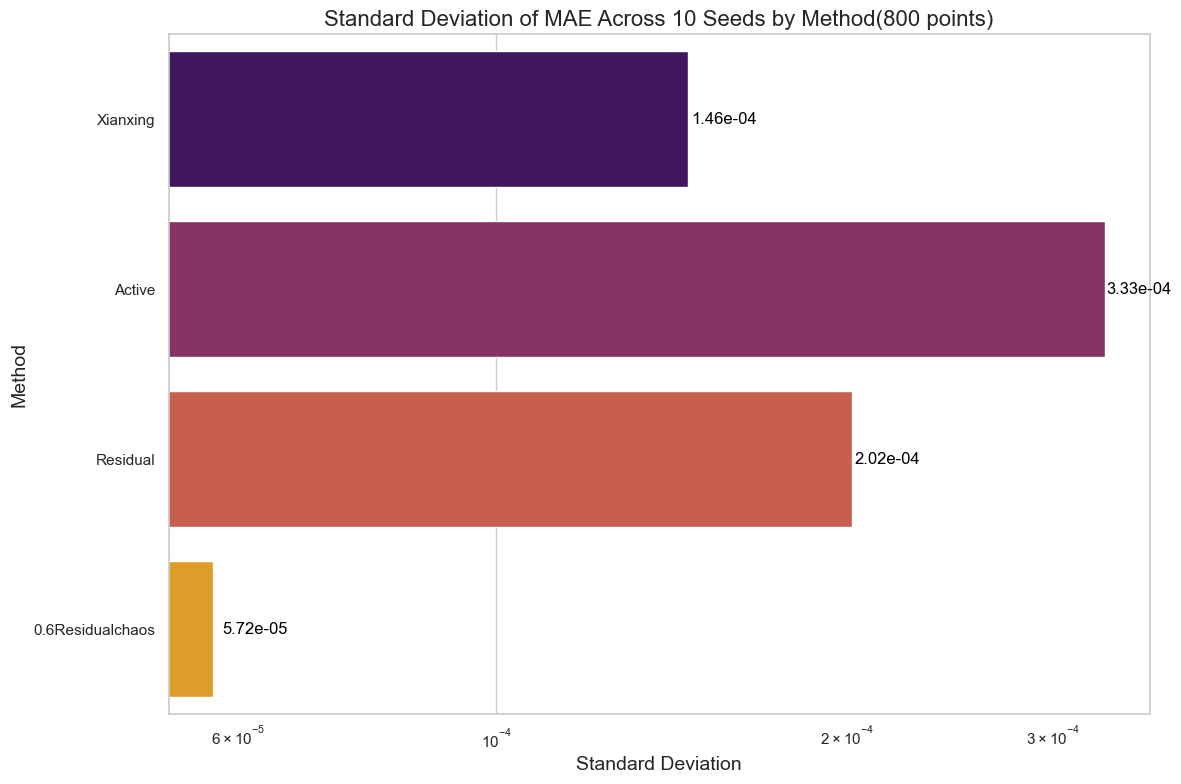

In [51]:
# 计算每种方法在10个seed下的标准差
std_df = dd.groupby('Method')['Values'].std().reset_index()
std_df.rename(columns={'Values': 'Std Dev'}, inplace=True)
# 创建图像
plt.figure(figsize=(12, 8))
# 使用 Seaborn 绘制标准差柱状图
sns.barplot(
    x='Std Dev',
    y='Method',
    data=std_df,
    palette="inferno",
    orient='h'
)

plt.xscale('log')

# 添加标题和轴标签
plt.title('Standard Deviation of MAE Across 10 Seeds by Method(800 points)', fontsize=16)
plt.xlabel('Standard Deviation', fontsize=14)
plt.ylabel('Method', fontsize=14)
# 显示标准差值
for index, row in std_df.iterrows():
    plt.text(
        row['Std Dev'] + 0.000001,  # 偏移值用于使文字避开柱状图
        index,
        f'{row["Std Dev"]:.2e}',
        color='black',
        va='center',
        fontsize=12
    )
# 调整布局
plt.tight_layout()
# 显示图像
plt.show()

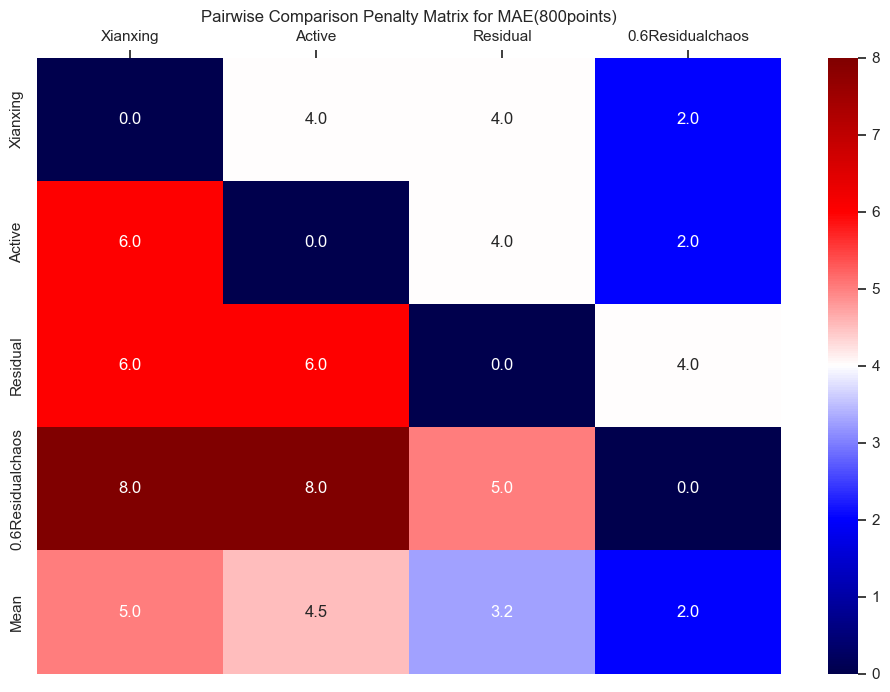

In [52]:
# 初始化惩罚矩阵
n_methods = len(methods)
penalty_matrix = np.zeros((n_methods, n_methods))

# 计算惩罚矩阵
for i, method_i in enumerate(methods):
    for j, method_j in enumerate(methods):
        if i != j:
            for k in range(len(loss_values[method_i])):
                if loss_values[method_i][k] < loss_values[method_j][k]:
                    penalty_matrix[i, j] += 1

# 计算列平均值
column_means = np.mean(penalty_matrix, axis=0)

# 添加列平均值到惩罚矩阵的底部
penalty_matrix_with_means = np.vstack([penalty_matrix, column_means])

# 创建热图
plt.figure(figsize=(12, 8))
ax = sns.heatmap(penalty_matrix_with_means, annot=True, fmt=".1f", cmap="seismic", xticklabels=methods, yticklabels=methods + ['Mean']) #cmap是颜色映射，annot是是否显示数值，fmt是数值格式

# 将x轴标签移动到顶部
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title('Pairwise Comparison Penalty Matrix for MAE(800points)')
# plt.xlabel('Methods')
# plt.ylabel('Methods')
plt.show()


In [53]:
# 筛选出 Metric 为 "Error_u" 的数据
error_u_df = df[df["Metric"] == "MSE"]

# 转换为字典格式
loss_values = {row["Method"]: row["Values"] for _, row in error_u_df.iterrows()}

# 显示结果
methods = list(loss_values.keys())
seeds = range(len(next(iter(loss_values.values()))))

seeds = range(10)

print("Methods:", methods)
print("Seeds:", seeds)
print("Loss Values:", loss_values)

Methods: ['Xianxing', 'Active', 'Residual', '0.6Residualchaos']
Seeds: range(0, 10)
Loss Values: {'Xianxing': [1.3760259750613761e-06, 2.8637132103525737e-06, 1.070846703079021e-06, 1.849373048771606e-07, 2.682261192118011e-07, 6.408034154532763e-07, 1.6712515840300313e-06, 5.206920430243376e-07, 4.01174444990926e-07, 1.0470413221197485e-06], 'Active': [1.2303020139852856e-06, 3.633758791230327e-07, 2.253802555674988e-06, 2.9304021752464323e-06, 7.880090458742406e-07, 1.0080233223903113e-07, 1.643361948831586e-06, 2.5266703511076475e-08, 1.1174369122568597e-06, 4.0409618922521255e-06], 'Residual': [1.0913378188304178e-05, 3.8562101548512897e-07, 4.6733020317744534e-07, 5.921952165822978e-07, 4.609491471215095e-07, 1.543376822400358e-07, 6.34825312696384e-07, 6.739245784616405e-07, 4.3685676147343515e-07, 5.317704250418828e-07], '0.6Residualchaos': [2.4146218514839883e-07, 3.2140713996865234e-07, 6.092316627457252e-07, 5.921952165822978e-07, 5.451356709193855e-07, 2.762804654258543e-07,

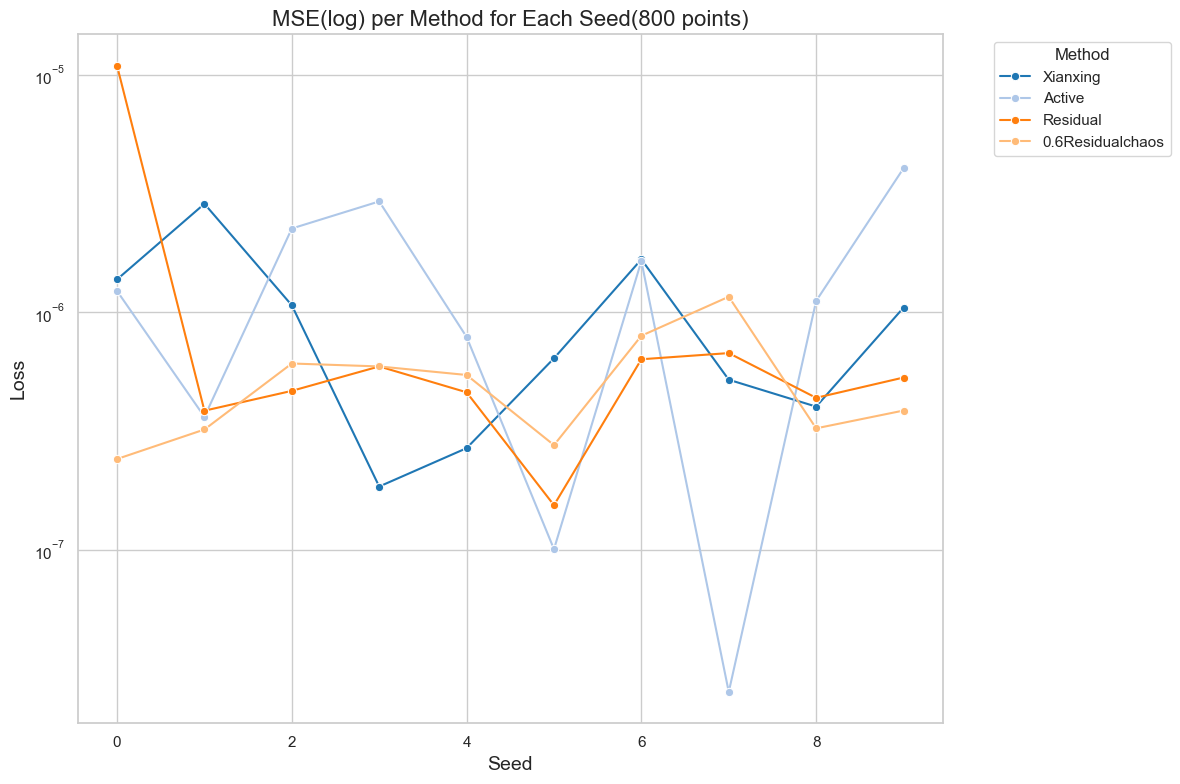

In [54]:
# 1. 转换数据为 DataFrame
data = []
for method, values in loss_values.items():
    for seed, value in enumerate(values):
        data.append({'Method': method, 'Seed': seed, 'Loss': value})

dd = pd.DataFrame(data)

# 确保方法按指定顺序排序
dd['Method'] = pd.Categorical(dd['Method'], categories=methods, ordered=True)

# 2. 绘制折线图
plt.figure(figsize=(12, 8))
sns.lineplot(data=dd, x='Seed', y='Loss', hue='Method', palette='tab20', marker='o')



# 设置纵坐标为对数尺度
plt.yscale('log')

# 3. 设置图形标题和标签
plt.title('MSE(log) per Method for Each Seed(800 points)', fontsize=16)
plt.xlabel('Seed', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# 4. 显示图形
plt.show()

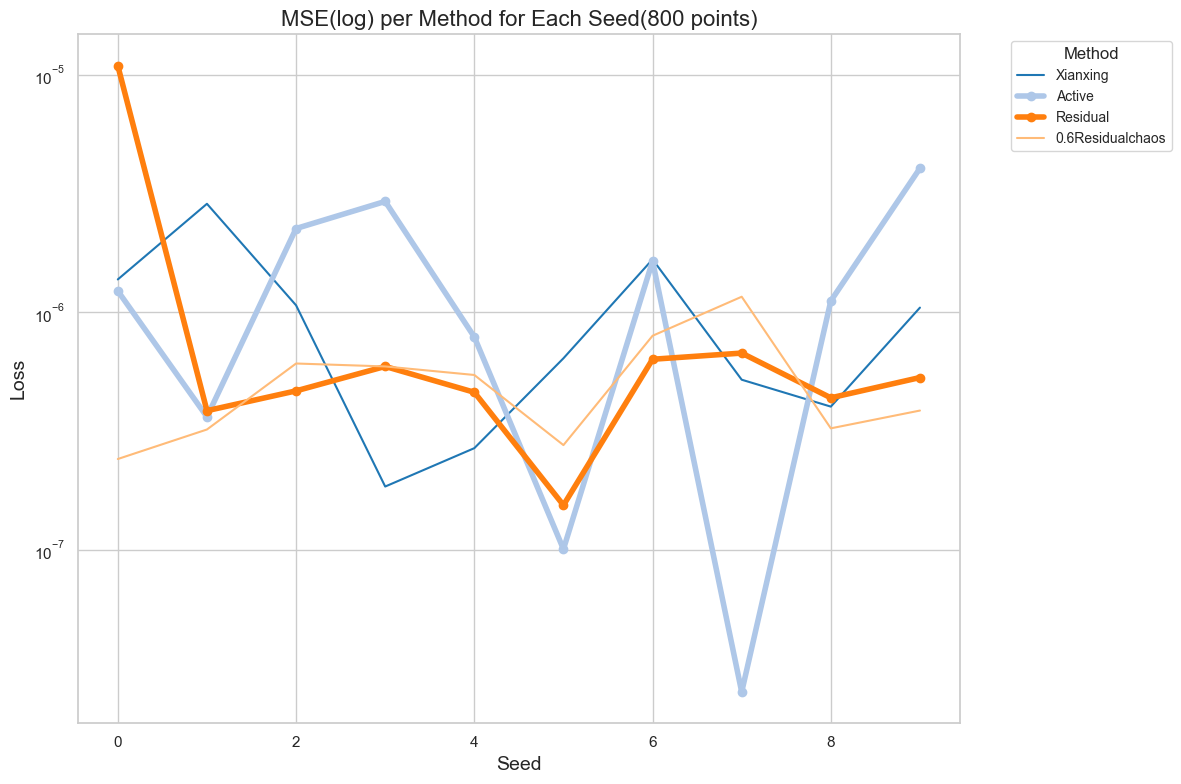

In [55]:
# 2. 设置颜色和线宽
highlight_methods = ['PINN', 'Residual', 'Active']
colors = sns.color_palette("tab20", len(methods))  # 使用 Seaborn 默认调色板
color_mapping = {method: colors[i] for i, method in enumerate(methods)}

linewidths = {method: 4 if method in highlight_methods else 1.5 for method in methods}

# 3. 绘制图形
plt.figure(figsize=(12, 8))

for method in methods:
    subset = dd[dd['Method'] == method]
    plt.plot(
        subset['Seed'], subset['Loss'],
        label=method,
        color=color_mapping[method],
        linewidth=linewidths[method],
        marker='o' if method in highlight_methods else None,
    )


# 设置纵坐标为对数尺度
plt.yscale('log')

# 4. 设置图形标题和标签
plt.title('MSE(log) per Method for Each Seed(800 points)', fontsize=16)
plt.xlabel('Seed', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid(True)
plt.tight_layout()

# 5. 显示图形
plt.show()

C:\Users\cheny\AppData\Local\Temp\ipykernel_23036\2163168095.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Values', y='Method', data=dd, ax=ax, palette=palette)


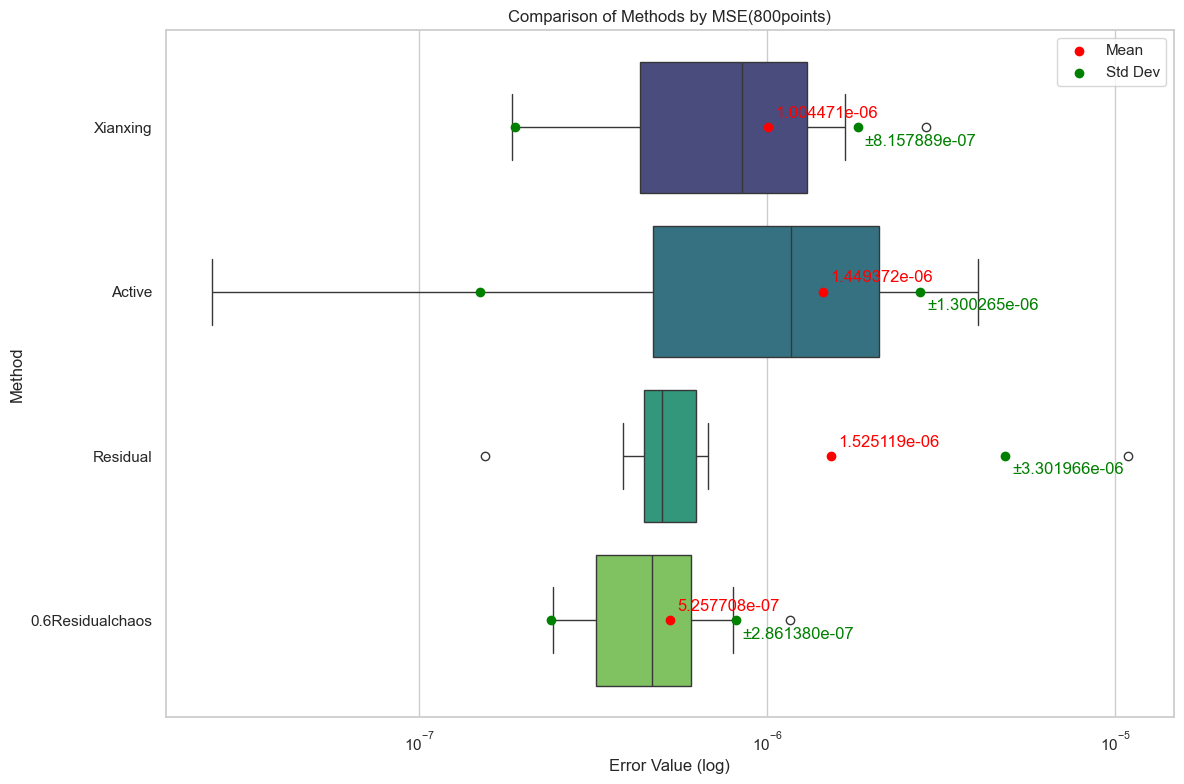

In [56]:
# 创建用于绘图的 DataFrame
data = []
for method, values in loss_values.items():
    for value in values:
        data.append({'Method': method, 'Values': value})


dd = pd.DataFrame(data)

# 设置 Seaborn 样式
sns.set(style="whitegrid")

# 将原始方法顺序设置为分类顺序
dd['Method'] = pd.Categorical(dd['Method'], categories=methods, ordered=True)

# 计算均值和标准差时保持顺序
mean_std_df = dd.groupby('Method')['Values'].agg(['mean', 'std']).reset_index()

# 创建图像
fig, ax = plt.subplots(figsize=(12, 8))

# 使用 Seaborn 绘制箱线图
palette = sns.color_palette("viridis", len(mean_std_df))
sns.boxplot(x='Values', y='Method', data=dd, ax=ax, palette=palette)

# 设置对数刻度
ax.set_xscale('log')

# 标注均值和标准差
for index, row in mean_std_df.iterrows():
    y_pos = list(mean_std_df['Method']).index(row['Method'])
    # 绘制均值为红点
    ax.scatter(row['mean'], y_pos, color='red', zorder=5, label="Mean" if index == 0 else "")
    # 绘制方差为绿点
    ax.scatter(row['mean'] + row['std'], y_pos, color='green', zorder=5, label="Std Dev" if index == 0 else "")
    ax.scatter(row['mean'] - row['std'], y_pos, color='green', zorder=5)
    # 标注均值和标准差值
    ax.annotate(f'{row["mean"]:.6e}', 
                xy=(row['mean'], y_pos), 
                xytext=(5, 10), 
                textcoords='offset points',
                va='center', 
                ha='left',
                color='red')
    ax.annotate(f'±{row["std"]:.6e}', 
                xy=(row['mean'] + row['std'], y_pos), 
                xytext=(5, -10), 
                textcoords='offset points',
                va='center', 
                ha='left',
                color='green')

# 添加标题和标签
ax.set_title('Comparison of Methods by MSE(800points)')
ax.set_xlabel('Error Value (log)')
ax.set_ylabel('Method')

# 添加图例
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:2], labels[:2], loc='upper right')

# 调整图像布局
plt.tight_layout()

# 显示图像
plt.show()

In [57]:
def rmse_to_mse(rmse):
    """
    将 RMSE 转换为 MSE。
    
    参数:
        rmse (float 或 list 或 numpy array): 均方根误差值
    
    返回:
        mse: 对应的均方误差值
    """
    import numpy as np
    rmse = np.array(rmse)
    mse = rmse ** 2
    return mse

rmse_to_mse(0.0003632)
rmse_to_mse([0.0003632, 0.0131793])

array([1.31914240e-07, 1.73693948e-04])

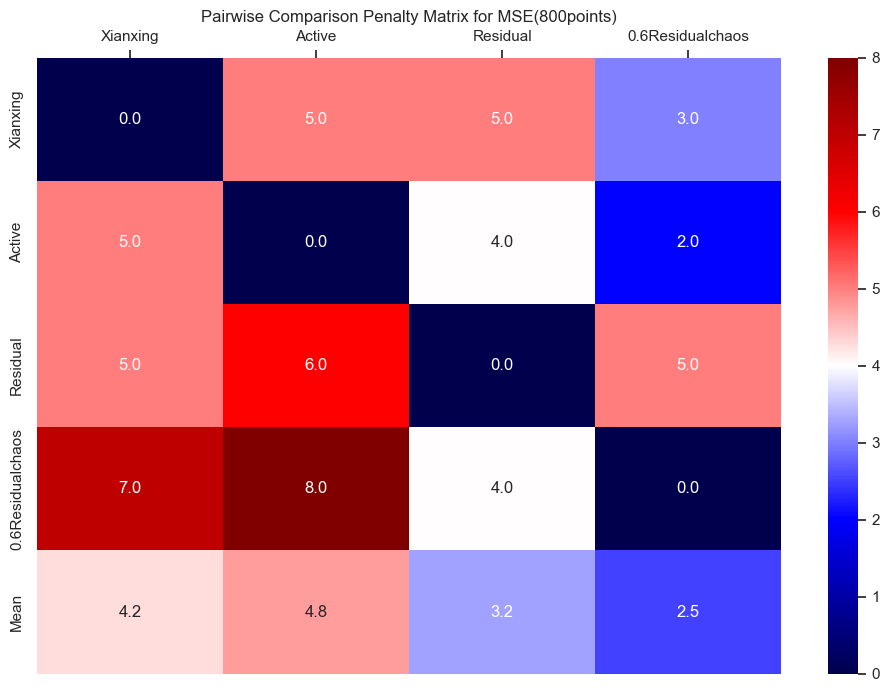

In [59]:
# 初始化惩罚矩阵
n_methods = len(methods)
penalty_matrix = np.zeros((n_methods, n_methods))

# 计算惩罚矩阵
for i, method_i in enumerate(methods):
    for j, method_j in enumerate(methods):
        if i != j:
            for k in range(len(loss_values[method_i])):
                if loss_values[method_i][k] < loss_values[method_j][k]:
                    penalty_matrix[i, j] += 1

# 计算列平均值
column_means = np.mean(penalty_matrix, axis=0)

# 添加列平均值到惩罚矩阵的底部
penalty_matrix_with_means = np.vstack([penalty_matrix, column_means])

# 创建热图
plt.figure(figsize=(12, 8))
ax = sns.heatmap(penalty_matrix_with_means, annot=True, fmt=".1f", cmap="seismic", xticklabels=methods, yticklabels=methods + ['Mean']) #cmap是颜色映射，annot是是否显示数值，fmt是数值格式

# 将x轴标签移动到顶部
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title('Pairwise Comparison Penalty Matrix for MSE(800points)')
# plt.xlabel('Methods')
# plt.ylabel('Methods')
plt.show()
